# Visualize model predictions

Ensure that samples entered are in the test set or validation set

In [1]:
import os
import sys
from pytorch_lightning import Trainer
import albumentations as A
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch
import pytorch_lightning as pl
import numpy as np

sys.path.append('.')
#from models.UNet_mateuszbuda import UNet_m
from models.UNet_L import UNet_no_val
from models.loss import DiceLoss, DiceLoss2

from run_pretraining import get_dataset

from data.CTDataSet import CTDicomSlices, DatasetManager
from data.CustomTransforms import Window, Imagify, Normalize

from tests.test_CTDataSet import plot_slices_and_mask

### Plotting function

In [2]:
def plot_img_and_mask(img, prediction, mask, text = ""):
    #mask = mask * 255 // 4
    #prediction = prediction * 255 // 4
    
    img = img.numpy()
    mask = mask.numpy()
    prediction = prediction.numpy()

    
    fig = plt.figure(figsize=(21,21))
    cols, rows = 3, 1
    
    fig.patch.set_facecolor('white')
    
    fig.add_subplot(rows, cols, 1)
    plt.title('CT Slice')
    plt.imshow(img, cmap='gray')
    
    fig.add_subplot(rows, cols, 2)
    plt.title('Prediction')
    plt.imshow(img, cmap='gray')
    plt.imshow(prediction, cmap='jet', alpha=0.3)
    
    fig.add_subplot(rows, cols, 3)
    plt.title('Ground truth')
    plt.imshow(img, cmap='gray')
    plt.imshow(mask, cmap='jet', alpha=0.3)
    
    plt.show()

### Some constants

In [8]:
WL = 50
WW = 200

img_size = 256

def to_float(x, **kwargs):
    return x.astype('float32')

### Create the relevant transforms

In [9]:
img_mask_tsfm = A.Compose([A.Resize(img_size, img_size)],
            additional_targets={"image1": 'image', "mask1": 'mask'})

In [10]:
test_set = False
WL = 50
WW = 200
mean = 61.0249
std = 78.3195

### Build the relevant datasets

In [16]:
main_dir = "../model_runs"
model_name = "pretrain_segmentation_imagenet"
model_dir = "{}/{}".format(main_dir, model_name)
checkpoint_f = 'epoch=14-step=36524.ckpt'

#dataset = "../organized_dataset_2"
dataset = '/mnt/g/thesis/ct_only_cleaned_resized_mini'

if test_set:
    dsm = DatasetManager.load_train_val_test(dataset, "{}/train.txt".format(model_dir), "{}/val.txt".format(model_dir), "{}/test.txt".format(model_dir))

    train_dicoms, val_dicoms, test_dicoms = dsm.get_dicoms() # DICOM glob is preset in the class file

    test_ds = CTDicomSlices(test_dicoms, img_and_mask_transform = img_mask_tsfm)

    test_dl = DataLoader(test_ds, batch_size=1, num_workers = 0, shuffle=True)
else:
    prep = transforms.Compose([Window(WL, WW), Imagify(WL, WW), Normalize(mean, std)])

    resize_tsfm = A.Compose([A.Resize(img_size, img_size)],
            additional_targets={"image1": 'image', "mask1": 'mask'})

    dcm_list = CTDicomSlices.generate_file_list(dataset, dicom_glob='/*/*/dicoms/*.dcm')
    ds = CTDicomSlices(dcm_list, preprocessing = prep,
                        resize_transform = resize_tsfm, n_surrounding=1, mask_is_255=False)
                        
    test_dl = DataLoader(ds, batch_size = 1, num_workers = 0, shuffle = True)

In [14]:
model = UNet_no_val.load_from_checkpoint("{}/logs/default/version_0/checkpoints/{}".format(model_dir, checkpoint_f), datasets=None, in_channels=3, classes=6)

/home/hussam/.local/lib/python3.8/site-packages/segmentation_models_pytorch/base/modules.py:102: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.activation(x)
Mask sum is 16461 and max is 5
Model WL: 50 - WW: 200
Input file is: ('/mnt/g/thesis/ct_only_cleaned_resized_mini/head-neck-radiomics/119/dicoms/32.dcm',)
Dice score 2 is: 31.868%


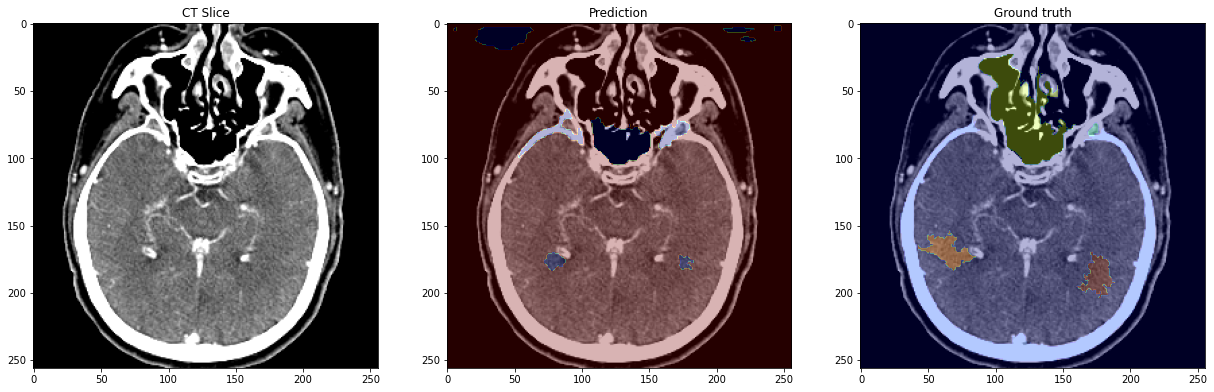

Mask sum is 5046 and max is 5
Model WL: 50 - WW: 200
Input file is: ('/mnt/g/thesis/ct_only_cleaned_resized_mini/head-neck-radiomics/109/dicoms/91.dcm',)
Dice score 2 is: 4.113%


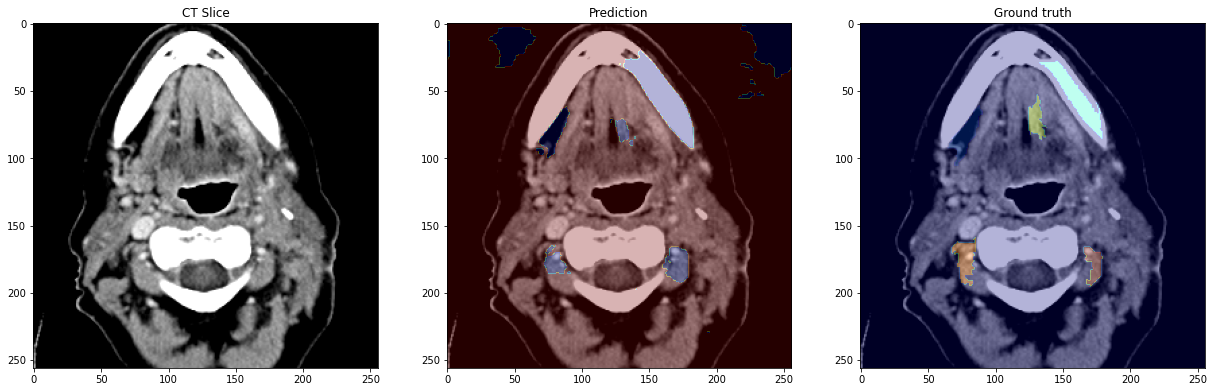

Mask sum is 3272 and max is 5
Model WL: 50 - WW: 200
Input file is: ('/mnt/g/thesis/ct_only_cleaned_resized_mini/head-neck-radiomics/100/dicoms/11.dcm',)
Dice score 2 is: 5.267%


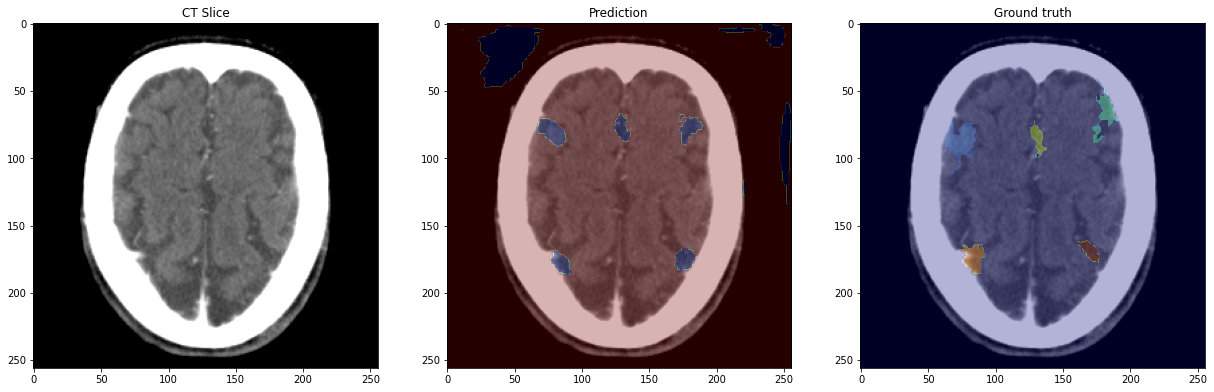

Mask sum is 150648 and max is 5
Model WL: 50 - WW: 200
Input file is: ('/mnt/g/thesis/ct_only_cleaned_resized_mini/head-neck-radiomics/112/dicoms/127.dcm',)
Dice score 2 is: 48.940%


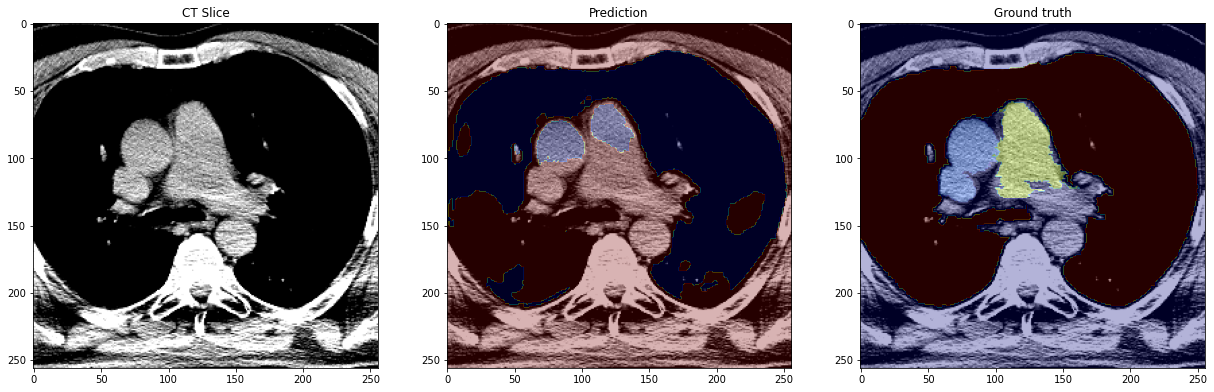

Mask sum is 75902 and max is 5
Model WL: 50 - WW: 200
Input file is: ('/mnt/g/thesis/ct_only_cleaned_resized_mini/head-neck-radiomics/105/dicoms/120.dcm',)
Dice score 2 is: 22.521%


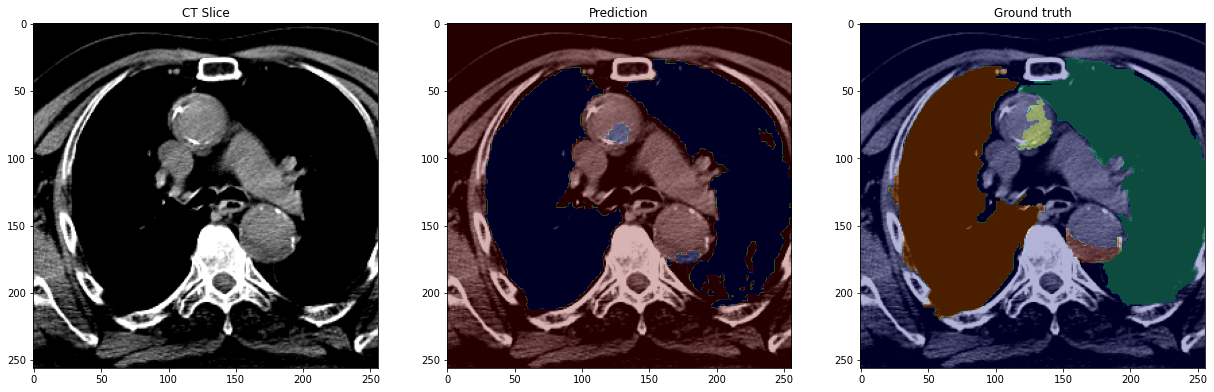

Mask sum is 7288 and max is 5
Model WL: 50 - WW: 200
Input file is: ('/mnt/g/thesis/ct_only_cleaned_resized_mini/head-neck-radiomics/116/dicoms/105.dcm',)
Dice score 2 is: 13.524%


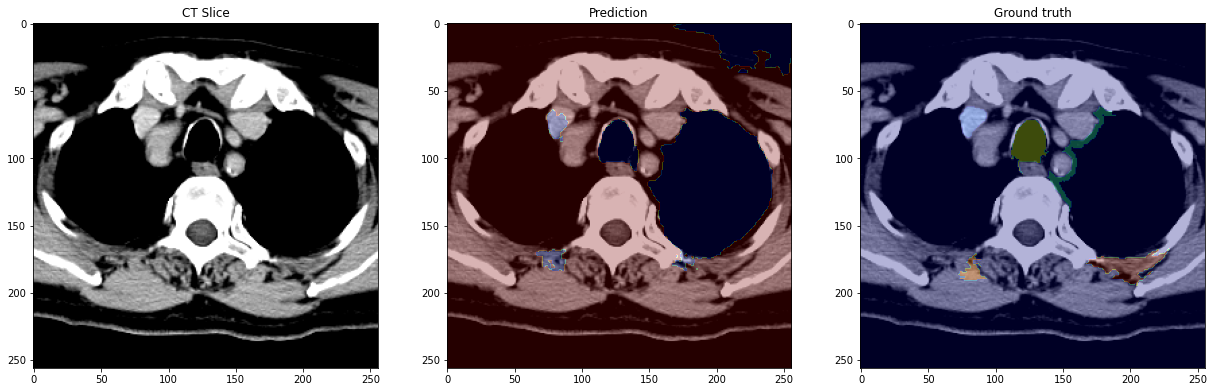

Mask sum is 4982 and max is 5
Model WL: 50 - WW: 200
Input file is: ('/mnt/g/thesis/ct_only_cleaned_resized_mini/head-neck-radiomics/12/dicoms/85.dcm',)
Dice score 2 is: 9.042%


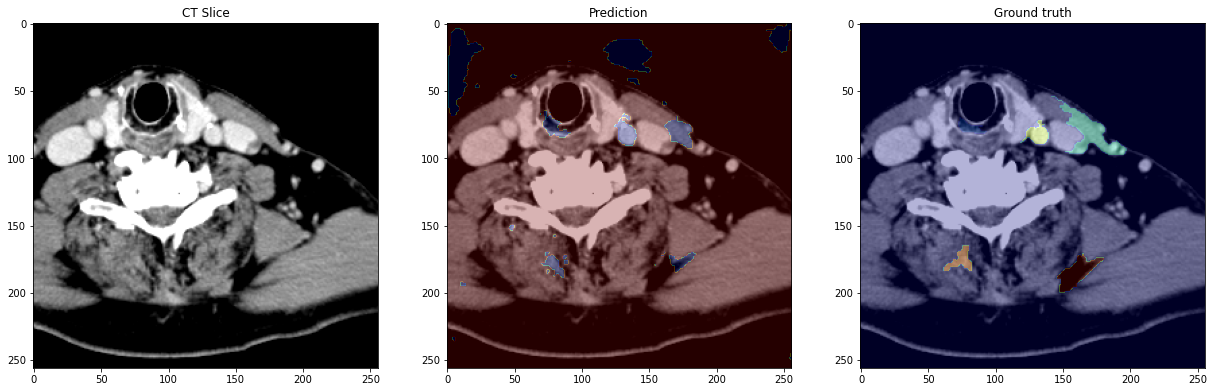

Mask sum is 135665 and max is 5
Model WL: 50 - WW: 200
Input file is: ('/mnt/g/thesis/ct_only_cleaned_resized_mini/head-neck-radiomics/112/dicoms/118.dcm',)
Dice score 2 is: 23.797%


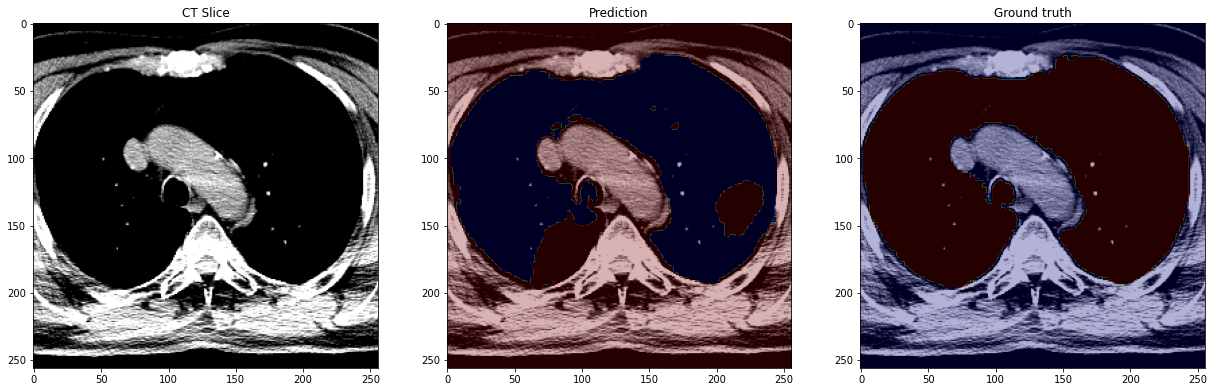

Mask sum is 3426 and max is 5
Model WL: 50 - WW: 200
Input file is: ('/mnt/g/thesis/ct_only_cleaned_resized_mini/head-neck-radiomics/114/dicoms/44.dcm',)
Dice score 2 is: 6.559%


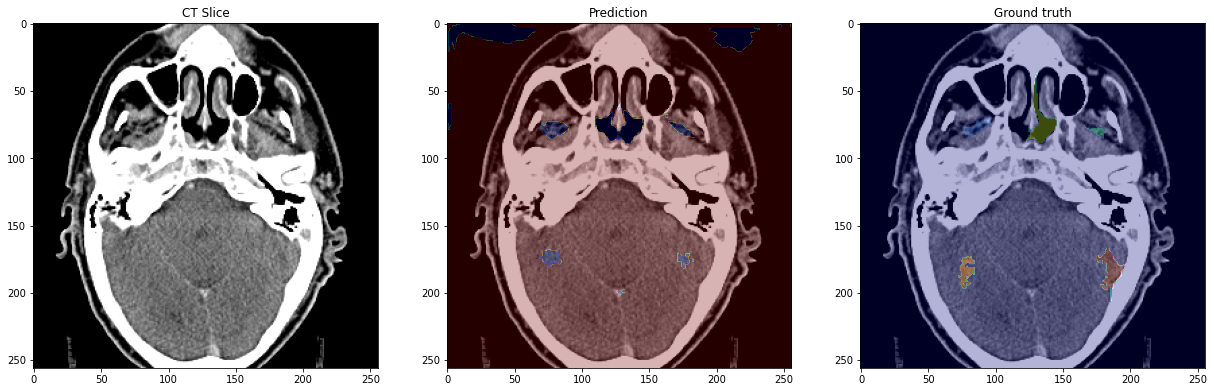

Mask sum is 3788 and max is 5
Model WL: 50 - WW: 200
Input file is: ('/mnt/g/thesis/ct_only_cleaned_resized_mini/head-neck-radiomics/119/dicoms/69.dcm',)
Dice score 2 is: 3.170%


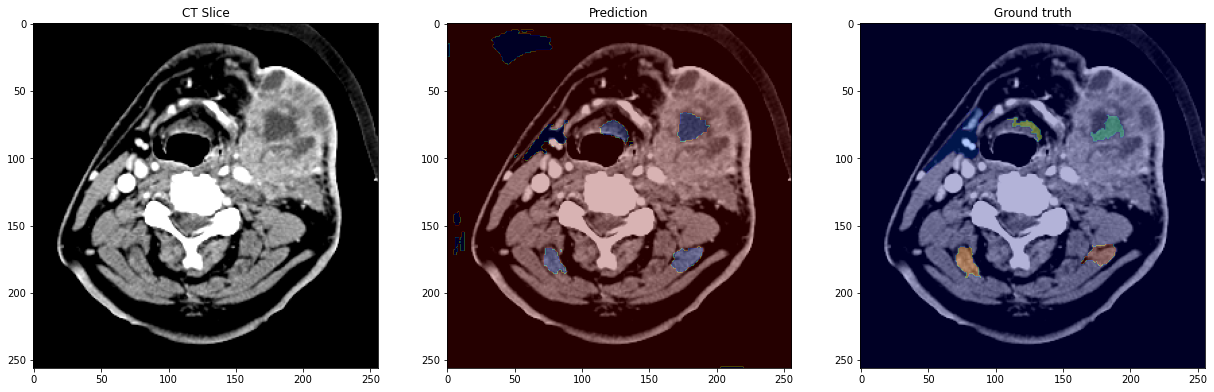

Mask sum is 145505 and max is 5
Model WL: 50 - WW: 200
Input file is: ('/mnt/g/thesis/ct_only_cleaned_resized_mini/head-neck-radiomics/109/dicoms/84.dcm',)
Dice score 2 is: 44.095%


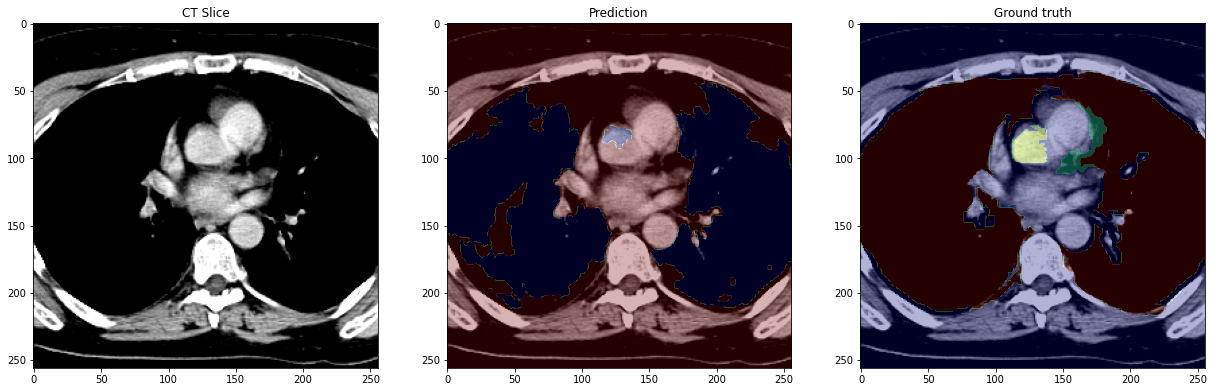

In [17]:
loss = DiceLoss()
loss2 = DiceLoss2()

max = 10
for i, (slices, mask, img_path, slice_n) in enumerate(test_dl):   
    y_pred = model(slices)
    
    if (torch.sum(mask) == 0 and torch.sum(torch.round(y_pred)) == 0):
        max += 1
        continue
    print("Mask sum is {} and max is {}".format(torch.sum(mask), torch.max(mask)))
    dice_score = 1 - model.loss(y_pred, mask)

    print("Model WL: {} - WW: {}".format(WL, WW))
    print("Input file is: {}".format(img_path))
    print("Dice score 2 is: {:.3f}%".format(dice_score * 100))

    plot_img_and_mask(slices[0,:,:,1], torch.round(y_pred[0,0,:,:].detach()), mask[0], slice_n)
    
    if i >= max:
        break

In [ ]:
slices, mask, img_path, slice_n = next(iter(test_dl))

mask = mask.type(torch.float32)
y_pred = model(slices)

print(mask.shape)
print(torch.round(y_pred[:,0,:,:]).shape)

print(pl.metrics.functional.dice_score(torch.round(y_pred[:,0,:,:]), mask))
print(loss(torch.round(y_pred[:,0,:,:]), mask))